# Go My Code Project

## Introduction to Artificial Intelligence

## Creator : Mahdi Guidara

## Loan Approval Prediction

##  In this task, a company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv('Prêt_immo.csv')

#10 first lines from the data
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Data Preprocessing

In [48]:
data.shape

(614, 13)

In [49]:
#Obtain informations about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [50]:
#Important Mathematical Values
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [51]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [52]:
data.LoanAmount=data.LoanAmount.fillna(data.LoanAmount.mean())

data.Credit_History=data.Credit_History.fillna(data.Credit_History.mean())

data.Loan_Amount_Term=data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())

data['Gender'].fillna(data['Gender'].value_counts().idxmax(), inplace=True)

data['Married'].fillna(data['Married'].value_counts().idxmax(), inplace=True)

data.Dependents.fillna(data.Dependents.value_counts().idxmax(), inplace=True)

data.Self_Employed.fillna(data.Self_Employed.value_counts().idxmax(), inplace=True)

In [53]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [54]:
data.drop(['Loan_ID'],axis=1,inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Data Visualization

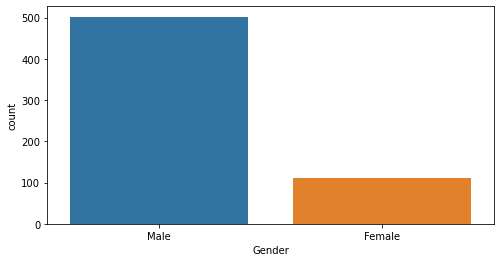

In [55]:
plt.figure(figsize=(8,4))
sns.countplot(data.Gender)
plt.show()

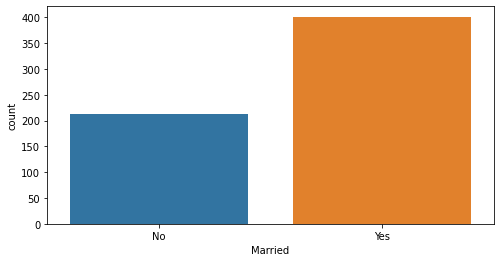

In [56]:
plt.figure(figsize=(8,4))
sns.countplot(data.Married)
plt.show()

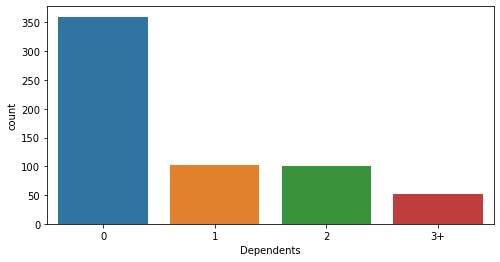

In [57]:
plt.figure(figsize=(8,4))
sns.countplot(data.Dependents)
plt.show()

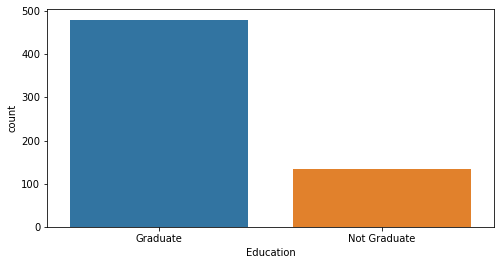

In [58]:
plt.figure(figsize=(8,4))
sns.countplot(data.Education)
plt.show()

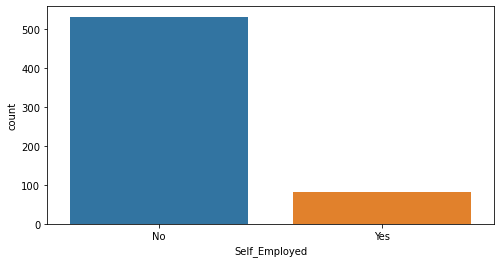

In [59]:
plt.figure(figsize=(8,4))
sns.countplot(data.Self_Employed)
plt.show()

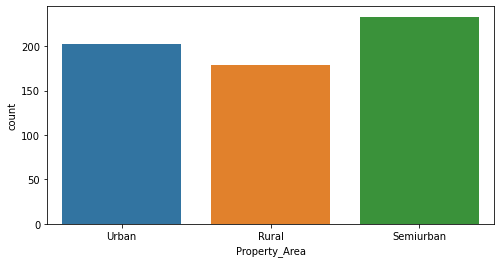

In [60]:
plt.figure(figsize=(8,4))
sns.countplot(data.Property_Area)
plt.show()

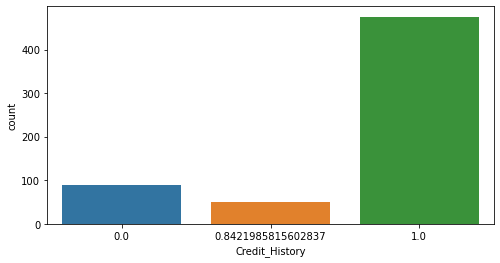

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(data.Credit_History)
plt.show()

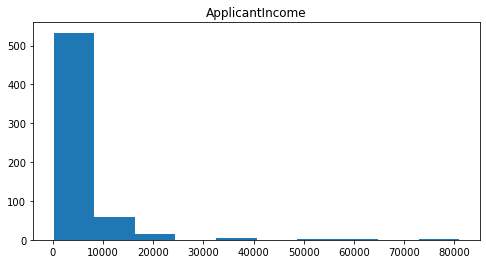

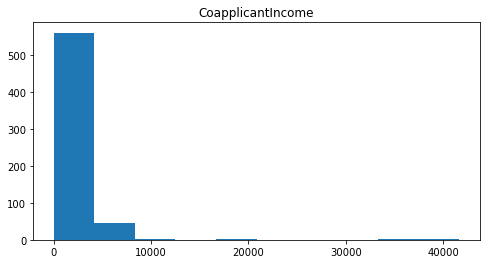

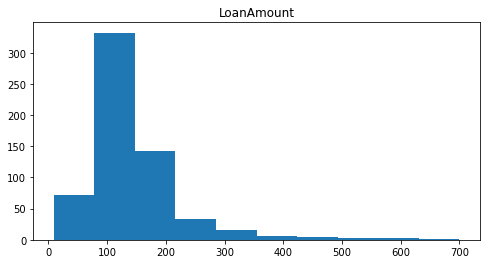

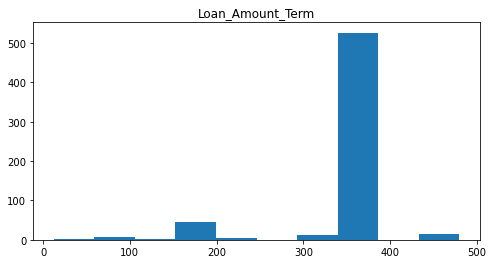

In [62]:
num=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']
for column in num:
    plt.figure(figsize=(8,4))
    plt.hist(data[column])
    plt.title(column)
    plt.show()

In [63]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [64]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,1


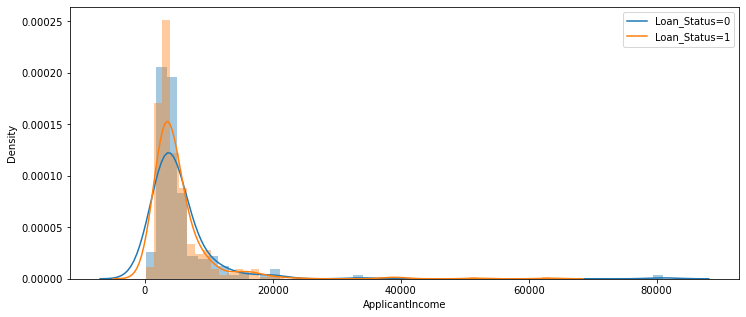

In [65]:
plt.figure(figsize=(12,5))
sns.distplot(data['ApplicantIncome'][data.Loan_Status==0])
sns.distplot(data['ApplicantIncome'][data.Loan_Status==1])
plt.legend(['Loan_Status=0','Loan_Status=1'])
plt.show()

In [66]:
pivot = pd.crosstab(data.Married,data.Loan_Status,margins=True)
pivot

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,288,401
All,192,422,614


In [67]:
ratio = pivot[1]/pivot['All']
ratio

Married
No     0.629108
Yes    0.718204
All    0.687296
dtype: float64

<AxesSubplot:xlabel='Married'>

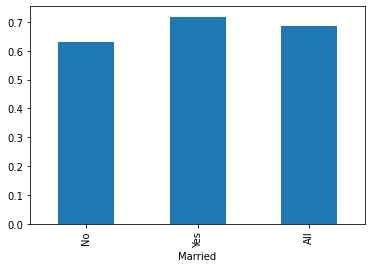

In [68]:
ratio.plot(kind='bar')

In [69]:
pivot1 = pd.crosstab(data.Gender,data.Loan_Status,margins=True)
pivot1

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,155,347,502
All,192,422,614


In [70]:
ratio1 = pivot1[1]/pivot1['All']
ratio1

Gender
Female    0.669643
Male      0.691235
All       0.687296
dtype: float64

<AxesSubplot:xlabel='Gender'>

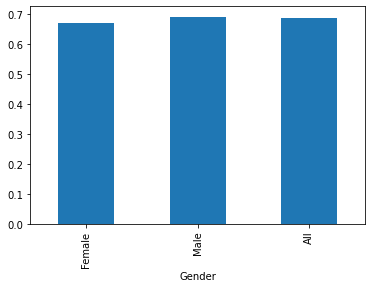

In [71]:
ratio1.plot(kind='bar')

In [72]:
pivot2 = pd.crosstab(data.Dependents,data.Loan_Status,margins=True)
pivot2

Loan_Status,0,1,All
Dependents,,,
0,113,247,360
1,36,66,102
2,25,76,101
3+,18,33,51
All,192,422,614


In [73]:
ratio2 = pivot2[1]/pivot2['All']
ratio2

Dependents
0      0.686111
1      0.647059
2      0.752475
3+     0.647059
All    0.687296
dtype: float64

<AxesSubplot:xlabel='Dependents'>

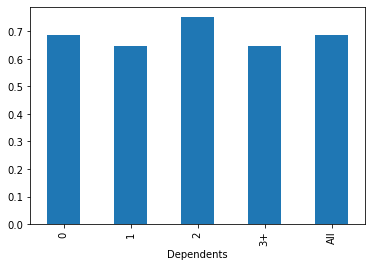

In [74]:
ratio2.plot(kind='bar')

In [75]:
pivot3 = pd.crosstab(data.Education,data.Loan_Status,margins=True)
pivot3

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [76]:
ratio3 = pivot3[1]/pivot3['All']
ratio3

Education
Graduate        0.708333
Not Graduate    0.611940
All             0.687296
dtype: float64

<AxesSubplot:xlabel='Education'>

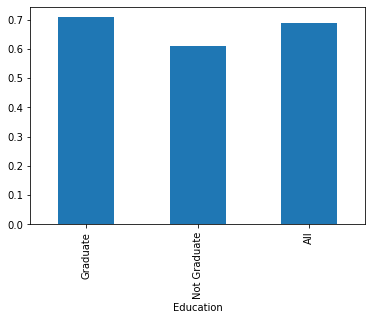

In [77]:
ratio3.plot(kind='bar')

In [78]:
pivot4 = pd.crosstab(data.Self_Employed,data.Loan_Status,margins=True)
pivot4

Loan_Status,0,1,All
Self_Employed,,,
No,166,366,532
Yes,26,56,82
All,192,422,614


In [79]:
ratio4 = pivot4[1]/pivot4['All']
ratio4

Self_Employed
No     0.687970
Yes    0.682927
All    0.687296
dtype: float64

<AxesSubplot:xlabel='Self_Employed'>

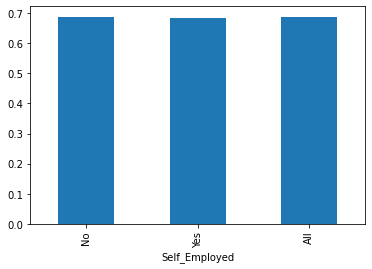

In [80]:
ratio4.plot(kind='bar')

In [81]:
pivot5= pd.crosstab(data.Credit_History,data.Loan_Status,margins=True)
pivot5

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
0.8421985815602837,13,37,50
1.0,97,378,475
All,192,422,614


In [82]:
ratio5= pivot5[1]/pivot5['All']
ratio5

Credit_History
0.0                   0.078652
0.8421985815602837    0.740000
1.0                   0.795789
All                   0.687296
dtype: float64

<AxesSubplot:xlabel='Credit_History'>

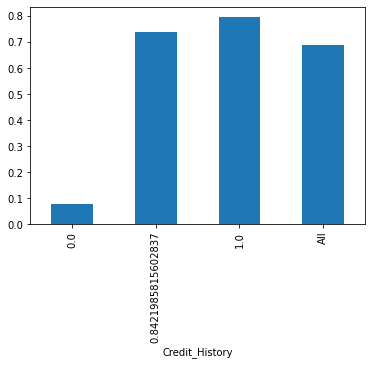

In [83]:
ratio5.plot(kind='bar')

In [84]:
pivot6= pd.crosstab(data.Property_Area,data.Loan_Status,margins=True)
pivot6

Loan_Status,0,1,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [85]:
ratio6= pivot6[1]/pivot6['All']
ratio6

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
All          0.687296
dtype: float64

<AxesSubplot:xlabel='Property_Area'>

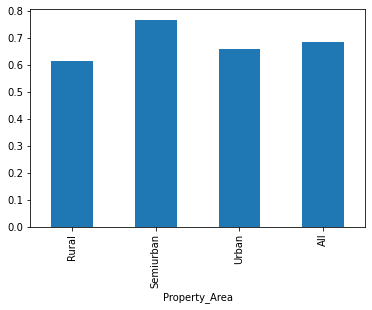

In [86]:
ratio6.plot(kind='bar')

In [87]:
from sklearn.preprocessing import LabelEncoder
data['Education']=LabelEncoder().fit_transform(data['Education'])
data['Dependents']=LabelEncoder().fit_transform(data['Dependents'])
data['Self_Employed']=LabelEncoder().fit_transform(data['Self_Employed'])
data['Gender']=LabelEncoder().fit_transform(data['Gender'])
data['Married']=LabelEncoder().fit_transform(data['Married'])
data['Property_Area']=LabelEncoder().fit_transform(data['Property_Area'])

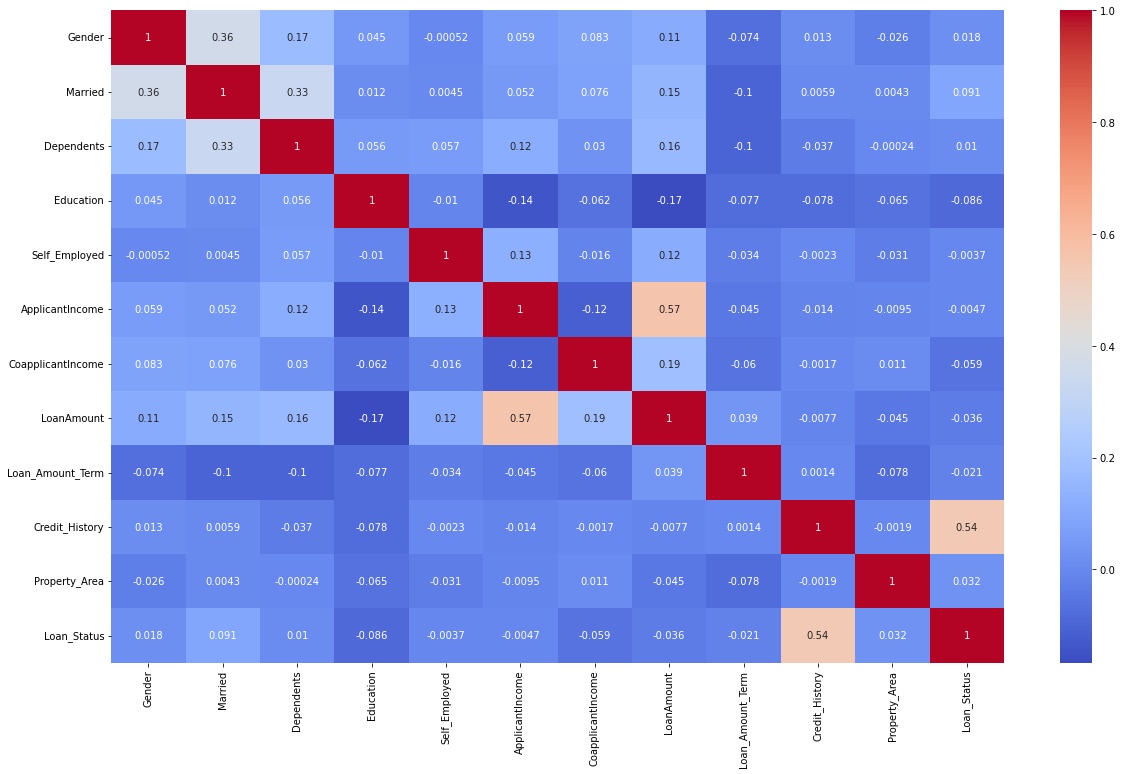

In [88]:
cor=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.show()


In [89]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac

In [91]:
data2=data
data2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Train-Test Split

In [92]:
#features extraction
x=data2[['Gender','Married','CoapplicantIncome','Loan_Amount_Term','Property_Area','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
y=data2[['Loan_Status']]

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15,random_state=40)

# Modeling: Choosing the right algorithm

## Logistic Regression

In [94]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#build our logistic model
logreg = LogisticRegression()  

#fitting training data
logreg.fit(x_train, y_train)  

#testing model’s performance
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.87


## Decision Tree

In [95]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [96]:
#applying tree algorithm
tree = tree.DecisionTreeClassifier()  

#fitting our model
tree.fit(x_train, y_train)   

# evaluating our model
y_pred=tree.predict(x_test)  
print("accuracy:{}".format(accuracy_score(y_test, y_pred)))

accuracy:0.6989247311827957


## Random Forest

In [104]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [105]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.7956989247311828


## KNN: K-Nearest-Neighbor 

In [100]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [101]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.78
Accuracy for k= 2 is: 0.8
Accuracy for k= 3 is: 0.8
Accuracy for k= 4 is: 0.77
Accuracy for k= 5 is: 0.78
Accuracy for k= 6 is: 0.78
Accuracy for k= 7 is: 0.8
Accuracy for k= 8 is: 0.8
Accuracy for k= 9 is: 0.78
Accuracy for k= 10 is: 0.81
Accuracy for k= 11 is: 0.8
Accuracy for k= 12 is: 0.81
Accuracy for k= 13 is: 0.81
Accuracy for k= 14 is: 0.77
Accuracy for k= 15 is: 0.8
Accuracy for k= 16 is: 0.76
Accuracy for k= 17 is: 0.81
Accuracy for k= 18 is: 0.73
Accuracy for k= 19 is: 0.77
Accuracy for k= 20 is: 0.75
Accuracy for k= 21 is: 0.78
Accuracy for k= 22 is: 0.69
Accuracy for k= 23 is: 0.76
Accuracy for k= 24 is: 0.65
Accuracy for k= 25 is: 0.73
Accuracy for k= 26 is: 0.59
Accuracy for k= 27 is: 0.65
Accuracy for k= 28 is: 0.49
Accuracy for k= 29 is: 0.6


Text(0, 0.5, 'Testing Accuracy')

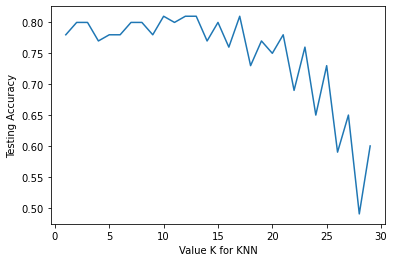

In [102]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [103]:
#build our knn classifier
knn=KNeighborsClassifier(n_neighbors=13)

#Training KNN classifier
knn.fit(x_train,y_train)

#Testing
y_pred=knn.predict(x_test)  
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.8064516129032258


# Conclusion

After training of differnet model (Logistic Regression, Decision Tree, Random Forest, KNN: K-Nearest-Neighbor) and see their acuuracy, we can use Logistic Regression model to predicte.

In [ ]:
import numpy as np

lst = [1, 2, 3]
lst_reshaped = np.array(lst).reshape((1,-1))
clf.predict(lst_reshaped)

In [ ]:
#x=data2[['Gender','Married','CoapplicantIncome','Loan_Amount_Term','Property_Area','Dependents','Education','Self_Employed','ApplicantIncome','LoanAmount','Credit_History']]
#y=data2[['Loan_Status']]